In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "PLTR"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.00,11.410,9.110,9.5000,9.5000,338584400
2020-10-01,9.69,10.100,9.230,9.4600,9.4600,124297600
2020-10-02,9.06,9.280,8.940,9.2000,9.2000,55018300
2020-10-05,9.43,9.490,8.920,9.0300,9.0300,36316900
2020-10-06,9.04,10.180,8.900,9.9000,9.9000,90864000
...,...,...,...,...,...,...
2023-05-08,7.64,7.855,7.590,7.7400,7.7400,105304000
2023-05-09,9.22,9.690,8.655,9.5500,9.5500,223573300
2023-05-10,9.73,10.300,9.460,9.9400,9.9400,149375000


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 659 entries, 2020-09-30 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       659 non-null    float64
 1   High       659 non-null    float64
 2   Low        659 non-null    float64
 3   Close      659 non-null    float64
 4   Adj Close  659 non-null    float64
 5   Volume     659 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 36.0 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,7.64,7.855,7.590,7.7400,7.7400,105304000
2023-05-09,9.22,9.690,8.655,9.5500,9.5500,223573300
2023-05-10,9.73,10.300,9.460,9.9400,9.9400,149375000
2023-05-11,10.14,10.159,9.710,9.8800,9.8800,73582200
2023-05-12,9.86,10.010,9.660,9.7901,9.7901,20458999


In [7]:
data.shape

(659, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,15.915256,16.393442,15.415217,15.890789,15.890789,4.940433e+07
std,7.974563,8.258850,7.636202,7.919623,7.919623,3.767184e+07
min,5.980000,6.170000,5.920000,6.000000,6.000000,9.126400e+06
25%,8.340000,8.520000,8.147500,8.335000,8.335000,2.914935e+07
50%,12.950000,13.340000,12.520000,12.940000,12.940000,3.837600e+07
75%,23.740000,24.265000,23.059999,23.545000,23.545000,5.467545e+07
max,39.540001,45.000000,36.130001,39.000000,39.000000,3.385844e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

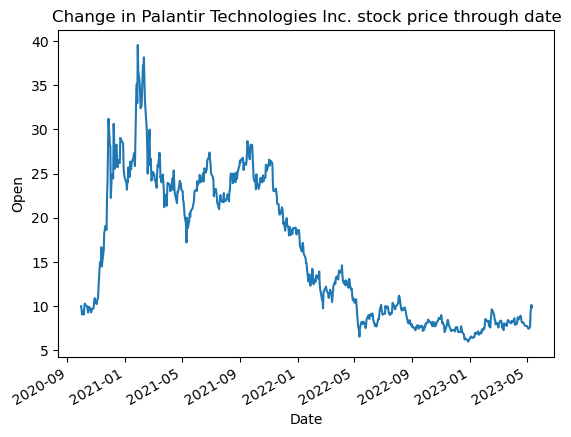

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Palantir Technologies lnc. stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((494, 3), (165, 3))

In [15]:
y_train.shape,y_test.shape

((494,), (165,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[24.58940008 13.47789987  7.3963      7.16319992 21.05429972 22.99860003
 35.4943     23.39010012  9.10619975 24.37440046  8.14509985  8.36019999
  9.6919      8.03490004 10.49779988 33.79600002 23.47310028 11.38359993
 13.75559987 11.20450014 10.63700009  8.13479988 28.42130032  9.67611296
  7.16389989 24.78759995 28.46770025  9.69010197 18.16469984  7.97140005
 24.36199982 14.72609998  8.34719995  9.78970092 20.74639988  8.15619986
 10.55669997 12.20970005  7.446      12.10949998 22.5696998   9.15889981
 24.00940002 16.66429956  7.35889999 19.89439981 31.01710056  7.49270011
 13.17519995  9.90520307 26.29389992  7.00319999 13.86159991 22.77450022
  6.96400009 22.95540009  9.5190002  13.17379992 20.40810024 24.15629976
 22.2105999  24.78449976  8.6854002   8.35460005  7.16909988 12.56339995
  8.0495     22.66949976  9.94730502  8.13509989 28.0992997   8.6385
 22.57860025 10.78590017  7.40700003 10.64969996  7.21999996  9.17950007
 10.05439981 20.83800011 20.75450022 26.11459995  8.418

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9947113370649757


In [22]:
y_test=list(y_test)

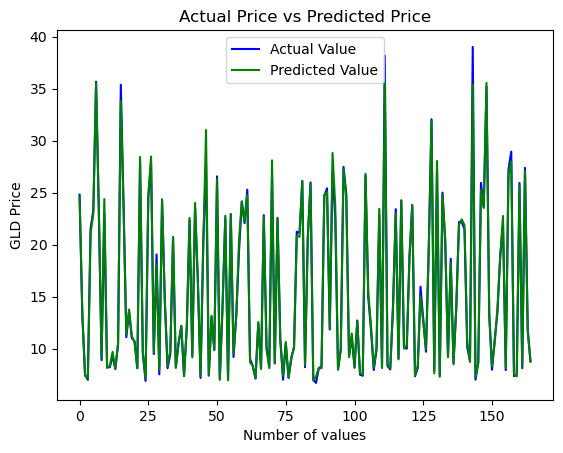

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

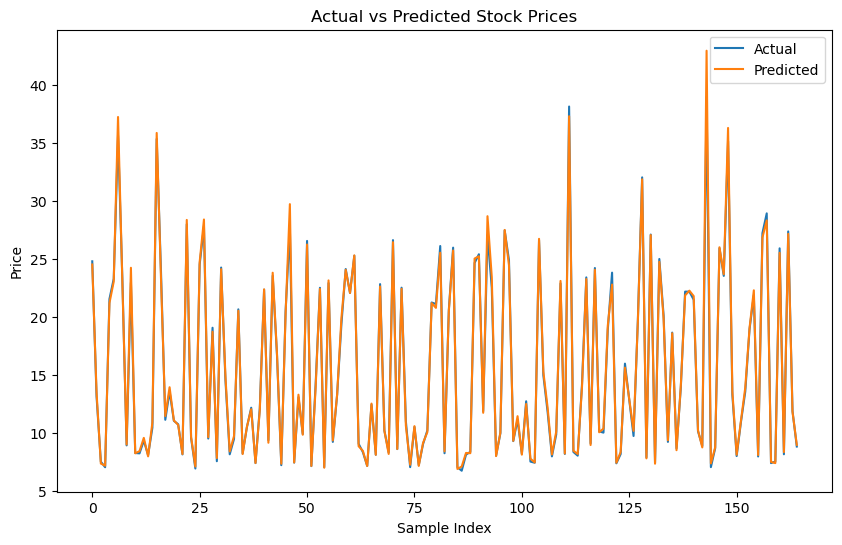

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([10.38148473,  9.65382325,  9.14121494,  9.0957473 ,  9.79082984,
       10.34414478, 10.15107682,  9.99960234,  9.76630484,  9.53080796,
        9.417236  ,  9.68628937,  9.74230665,  9.62257369,  9.40206383,
        9.36628142,  9.5471141 ,  9.62484542,  9.82262638, 10.72058087,
       10.48334447, 10.79687112, 10.09189194, 10.48993828, 10.75317244,
       10.69565562, 11.78350499, 14.13452952, 15.01510268, 13.63202113,
       15.48389204, 15.2487348 , 15.61484322, 15.34240642, 18.03597643,
       18.43626013, 18.44296936, 18.71215038, 20.67860056, 22.46422724,
       28.05244987, 29.04080022, 26.51029478, 25.34782671, 22.26664503,
       25.04111093, 24.09511286, 27.82111738, 28.49834396, 26.24632366,
       27.08995284, 27.14003863, 27.08107762, 26.02597232, 25.57508796,
       26.8398464 , 26.32968802, 27.44354436, 27.62441737, 28.57554442,
       28.07894082, 26.25216223, 24.98714564, 25.39806843, 23.84174187,
       23.26730742, 24.05785809, 23.70059672, 24.61299494, 25.47

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value645
enter a value76
enter a value75
-236.82655933331978


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("PLTR_model.pkl",'wb')
pickle.dump(model,file)